In [73]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd

In [49]:
dir_no_classif = '/volatile/jl277509/data/UkBioBank/crops/1.5mm_no_reclassif/CINGULATE/mask/'
dir_classif = '/volatile/jl277509/data/UkBioBank/crops/1.5mm/CINGULATE/mask/'

In [50]:
skel_classif = np.load(dir_classif+'Rskeleton.npy')
skel_no_classif = np.load(dir_no_classif+'Rskeleton.npy')
distbottom_classif = np.load(dir_classif+'Rdistbottom.npy')
distbottom_no_classif = np.load(dir_no_classif+'Rdistbottom.npy')

In [51]:

# IOU skel
b_sk_cl = skel_classif != 0
b_sk_no_cl = skel_no_classif != 0
IOU = np.sum(np.logical_and(b_sk_cl, b_sk_no_cl)) / np.sum(np.logical_or(b_sk_cl, b_sk_no_cl))
print(IOU)

0.8816834239211637


In [52]:
# Size diff
np.sum(b_sk_no_cl) / np.sum(b_sk_cl)

#NB: more voxels without reclassif than with. Maybe because immortals list is extended ? (0.3%)

1.0025863907038717

In [53]:
np.unique(skel_no_classif)

array([  0,  30,  35,  60, 100, 120], dtype=int16)

In [54]:
# proportion of each topoligical value
# the other values are not the same, it is not comparable
topo_values = [30,  35]
for val in topo_values:
    print(f'{val}: {np.sum(skel_no_classif==val) / np.sum(skel_classif==val)}')

# however less bottom before reclassif. Consistent with the fact that we retrieve bottom lines (2%)
# more top before reclassif

30: 0.9834731389425503
35: 1.0993865942511403


In [55]:
## TOO SLOW
#d_classif_flat = distbottom_classif.flatten()
#l_distbottom_classif = [elem for elem in d_classif_flat if elem<30000]
#d_no_classif_flat = distbottom_no_classif.flatten()
#l_distbottom_no_classif = [elem for elem in d_no_classif_flat if elem<30000]

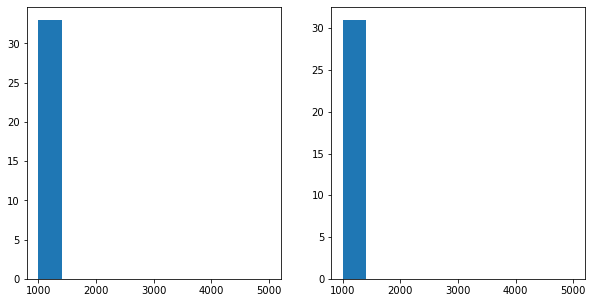

In [44]:
fig, axs = plt.subplots(figsize=(10,5), ncols=2)
axs[0].hist(distbottom_no_classif.flatten(), range=(1000,5000))
axs[1].hist(distbottom_classif.flatten(), range=(1000,5000))
plt.show()

In [66]:
np.unique(distbottom_no_classif.flatten()[:1000000])

array([    0,    75,   106,   130,   150,   181,   205,   212,   225,
         236,   256,   260,   280,   287,   300,   311,   318,   331,
         335,   342,   355,   362,   366,   375,   386,   390,   393,
         406,   410,   417,   424,   430,   437,   441,   448,   450,
         461,   465,   468,   472,   481,   485,   492,   496,   499,
         505,   512,   516,   520,   523,   525,   530,   536,   540,
         543,   547,   554,   556,   560,   567,   571,   574,   578,
         580,   587,   591,   598,   600,   602,   605,   611,   615,
         618,   622,   626,   629,   631,   635,   642,   646,   649,
         653,   655,   660,   662,   666,   673,   677,   680,   686,
         693,   697,   704,   708,   717,   721,   724,   732,   748,
         752,   755,   759,   772,   786,   803,   807, 32500, 32501],
      dtype=int16)

In [74]:
subjects = pd.read_csv(dir_classif + 'Rskeleton_subject.csv')['Subject']

In [78]:
rng = 1800
step = 100
thresholds = range(0, rng, step)
thresholds_shiffted = range(step, rng+step, step)
#distbottom_classif_no_outside = distbottom_classif<30000
#distbottom_no_classif_no_outside = distbottom_no_classif<30000
for t,t_ in zip(thresholds, thresholds_shiffted):

    arr1 = np.logical_and(distbottom_classif<t_, distbottom_classif>=t)
    n1 = np.sum(arr1)
    max_arr1 = np.max(np.sum(arr1, axis=(1,2,3)))
    sub_max1 = subjects[np.argmax(np.sum(arr1, axis=(1,2,3)))]

    arr2 = np.logical_and(distbottom_no_classif<t_, distbottom_no_classif>=t)
    n2 = np.sum(arr2)
    max_arr2 = np.max(np.sum(arr2, axis=(1,2,3)))
    sub_max2 = subjects[np.argmax(np.sum(arr2, axis=(1,2,3)))]

    print(f'distance to bottom {t}-{t_} : classif : {n1} (max: {max_arr1}, subject: {sub_max1}), \
          no classif: {n2} (max: {max_arr2}, subject: {sub_max2})\
          classif/no_classif : {n1/n2}')

distance to bottom 0-100 : classif : 4867956 (max: 481, subject: sub-4989927),           no classif: 4674962 (max: 386, subject: sub-4989927)          classif/no_classif : 1.0412824745955154
distance to bottom 100-200 : classif : 3774502 (max: 573, subject: sub-4989927),           no classif: 3502217 (max: 547, subject: sub-4989927)          classif/no_classif : 1.0777464674519026
distance to bottom 200-300 : classif : 2766937 (max: 596, subject: sub-4989927),           no classif: 2718946 (max: 653, subject: sub-4989927)          classif/no_classif : 1.0176505896034713
distance to bottom 300-400 : classif : 1671269 (max: 445, subject: sub-4989927),           no classif: 1871597 (max: 498, subject: sub-4989927)          classif/no_classif : 0.8929641370444599
distance to bottom 400-500 : classif : 883216 (max: 163, subject: sub-4989927),           no classif: 1094284 (max: 197, subject: sub-4989927)          classif/no_classif : 0.8071177135003345
distance to bottom 500-600 : classif :

In [80]:
# compare distances 1.5mm / 2mm
# 2mm old skel vs 1.5mm newer skel without reclassif: compare 100 to 106
a = np.load('/volatile/jl277509/data/UkBioBank/crops/1.5mm/CINGULATE/mask/Rdistbottom.npy')
b = np.load('/volatile/jl277509/data/UkBioBank/crops/2mm/CINGULATE/mask/Rdistbottom.npy')

In [87]:
r1 = np.sum(a<=106)
r2 = np.sum(a==0)
print(f'1.5mm nb voxels <= 106: {r1}, nb vx / nb bottom: {(r1-r2)/r2}')

r1 = np.sum(a<=100)
r2 = np.sum(a==0)
print(f'1.5mm nb voxels <= 100: {r1}, nb vx / nb bottom: {(r1-r2)/r2}')

r1 = np.sum(b<=100)
r2 = np.sum(b==0)
print(f'2mm nb voxels <= 100: {r1}, nb vx / nb bottom: {(r1-r2)/r2}')

1.5mm nb voxels <= 106: 6055624, nb vx / nb bottom: 1.0842673135547396
1.5mm nb voxels <= 100: 4674962, nb vx / nb bottom: 0.6090613434239796
2mm nb voxels <= 100: 2934625, nb vx / nb bottom: 0.608486108796885


In [ ]:
## CONCLUSION : KEEP DISTANCE 100 TO KEEP THE PROPORTION OF VOXELS AFFECTED

In [88]:
# Do QC
sk_cl  = skel_classif!=0
size_skel = np.sum(sk_cl, axis=(1,2,3))

In [106]:
sorted_size = list(size_skel.flatten())
sorted_size.sort()

In [114]:
print(sorted_size[:15])
print(sorted_size[-15:])
print(np.mean(sorted_size))
print(np.quantile(sorted_size,0.01), np.quantile(sorted_size,0.99))

[151, 328, 379, 390, 400, 404, 408, 408, 411, 418, 419, 421, 421, 422, 424]
[1004, 1008, 1010, 1014, 1023, 1044, 1045, 1047, 1071, 1074, 1087, 1156, 1305, 1392, 2359]
687.0687820634619
495.51 892.4900000000016
